In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

In [31]:
model_name = ["resnet34", "mobile_net_v3_large", "efficient_net_b1"]
num_epochs = "100"
lr_start = "0.01"
lr_end = "0.001"
batch_size = "32"

In [4]:
model_params = {}

In [5]:
def get_metrics(models, dataset_name, num_epochs, batch_size,
                lr_start, lr_end):
    val_acc = {}
    val_loss = {}
    val_true = {}
    val_pred = {}

    train_acc = {}
    train_loss = {}
    train_true = {}
    train_pred = {}
    
    
    for model_name in models:
        
        with open(f'../../models/val_history_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
            val_history = pickle.load(handle)

        with open(f'../../models/train_history_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
            train_history = pickle.load(handle)
        
        try:
            val_acc[model_name] = [i.item() for i in val_history['acc']]
        except:
            val_acc[model_name] = val_history['acc']
        val_loss[model_name] = val_history['loss']
        val_pred[model_name] = val_history['outputs']
        val_true[model_name] = val_history['targets']

        train_acc[model_name] = train_history['acc']
        train_loss[model_name] = train_history['loss']
        train_pred[model_name] = train_history['outputs']
        train_true[model_name] = train_history['targets']
        
    
    
    return {'train_acc': train_acc, 'train_loss': train_loss, 'train_pred': train_pred, 'train_true': train_true,
                                 'val_acc': val_acc, 'val_loss': val_loss, 'val_pred': val_pred, 'val_true': val_true}

# Chest X-Ray8

In [12]:
dataset_name = "chest_xray_8"

In [6]:
model_params[dataset_name] = get_metrics(model_name, dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [7]:
model_params[dataset_name]['train_acc'].keys()

dict_keys(['resnet34', 'mobile_net_v3_large', 'efficient_net_b1'])

# Pneumonia

In [8]:
dataset_name = "pneumonia"

In [9]:
model_params[dataset_name] = get_metrics(model_name, dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [10]:
model_params[dataset_name]['train_acc'].keys()

dict_keys(['resnet34', 'mobile_net_v3_large', 'efficient_net_b1'])

# COVID

In [11]:
dataset_name = "covid_pneumonia"

In [12]:
model_params[dataset_name] = get_metrics(model_name, dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [13]:
model_params[dataset_name]['train_acc'].keys()

dict_keys(['resnet34', 'mobile_net_v3_large', 'efficient_net_b1'])

# Plotting

In [94]:
colors_acc = {'chest_xray_8': 'yellowgreen', 'covid_pneumonia': 'lightcoral', 'pneumonia': 'cornflowerblue'}
colors_loss = {'chest_xray_8': 'green', 'covid_pneumonia': 'firebrick', 'pneumonia': 'blue'}
middle_flag = {'resnet34': False, 'efficient_net_b1': True, 'mobile_net_v3_large': False}
start_flag = {'resnet34': True, 'efficient_net_b1': False, 'mobile_net_v3_large': False}
end_flag = {'resnet34': False, 'efficient_net_b1': False, 'mobile_net_v3_large': True}

In [95]:
model_names = {'resnet34': "ResNet 34", 
               'mobile_net_v3_large': "MobileNet V3 Large", 
               'efficient_net_b1': "EfficientNet B1"}
dataset_names = {'chest_xray_8': "Chest X-ray 8", 
               'covid_pneumonia': "COVID + Pneumonia", 
               'pneumonia': "Pneumonia"}

In [96]:
model = model_name[0]

In [97]:
model_name = ["resnet34", "efficient_net_b1", "mobile_net_v3_large"]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


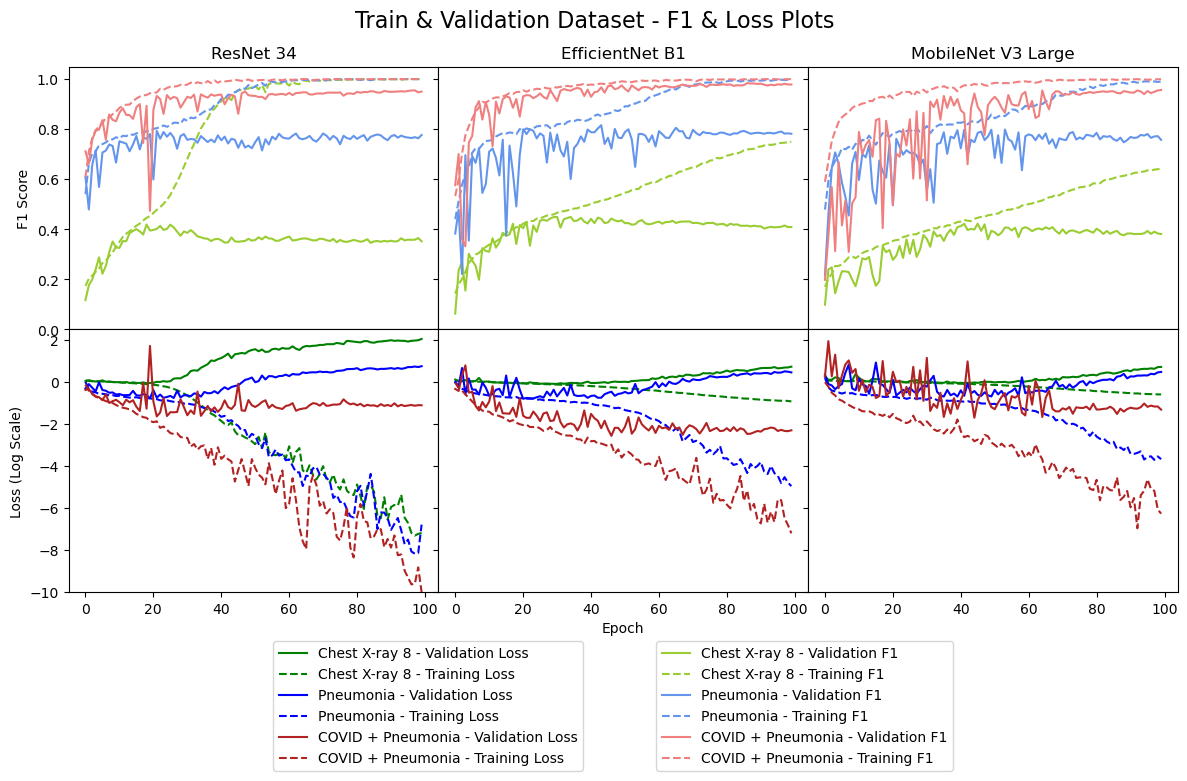

In [98]:
#fig, ax1 = plt.subplots(1,3, figsize=(12, 5))
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
ax1, ax2 = gs.subplots(sharex='col', sharey='row')


#ax2 = []
fig.suptitle(f'Train & Validation Dataset - F1 & Loss Plots', fontsize=16)
epochs = [i for i in range(int(num_epochs))]
for i in range(3):
    model = model_name[i]
    ax1[i].set_title(f'{model_names[model]}')
    # plt.figure()
    if start_flag[model]:
        ax1[i].set_ylabel('F1 Score')
    if middle_flag[model]:
        ax2[i].set_xlabel('Epoch')
    
    color = 'black'

    for data in model_params.keys():
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(model_params[data]['val_true'][model], model_params[data]['val_pred'][model])],
                 label=f'{dataset_names[data]} - Validation F1', 
                 color=colors_acc[data])
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(model_params[data]['train_true'][model], model_params[data]['train_pred'][model])],
                 label=f'{dataset_names[data]} - Training F1', 
                 color=colors_acc[data], linestyle='--')

    ax1[i].tick_params(axis='y', labelcolor=color)   
    ax1[i].set_ylim([0, 1.05])

    #ax2.append(ax1[i].twinx())
    color = 'black'
    
    if start_flag[model]:
        ax2[i].set_ylabel('Loss (Log Scale)', color=color)

    for data in model_params.keys():
        ax2[i].plot(epochs, 
                 np.log(model_params[data]['val_loss'][model]),
                 label=f'{dataset_names[data]} - Validation Loss', 
                 color=colors_loss[data])
        ax2[i].plot(epochs, 
                 np.log(model_params[data]['train_loss'][model]),
                 label=f'{dataset_names[data]} - Training Loss', 
                 color=colors_loss[data], linestyle='--')

    ax2[i].set_ylim([-10, 2.5])
    ax2[i].tick_params(axis='y', labelcolor=color)    
    
    if middle_flag[model]:
        ax1[i].legend(bbox_to_anchor=(1., -2.1, 0.41, 0.94))
        ax2[i].legend(bbox_to_anchor=(0., -1.1, 0.41, 0.94))

fig.tight_layout()
#fig.savefig("f1_loss_separate.png", format="png", dpi=600, bbox_inches="tight")
fig.savefig("f1_loss_separate.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)
#fig.savefig("f1_loss_separate.pdf", format="pdf", dpi=1200, bbox_inches="tight", transparent=True)

#fig.legend(bbox_to_anchor=(0., -1., 0.41, 0.94))

# Transfer Learning

In [32]:
tl_model_params = {}

In [35]:
def get_metrics_tl(model_name, dataset_name, num_epochs, batch_size,
                lr_start, lr_end):
    val_acc = {}
    val_loss = {}
    val_true = {}
    val_pred = {}

    train_acc = {}
    train_loss = {}
    train_true = {}
    train_pred = {}
    
    
    with open(f'../../models/val_history_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
        val_history = pickle.load(handle)

    with open(f'../../models/train_history_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
        train_history = pickle.load(handle)

    try:
        val_acc[model_name] = [i.item() for i in val_history['acc']]
    except:
        val_acc[model_name] = val_history['acc']
    val_loss[model_name] = val_history['loss']
    val_pred[model_name] = val_history['outputs']
    val_true[model_name] = val_history['targets']

    train_acc[model_name] = train_history['acc']
    train_loss[model_name] = train_history['loss']
    train_pred[model_name] = train_history['outputs']
    train_true[model_name] = train_history['targets']
    
    
    with open(f'../../models/val_history_{model_name}_{dataset_name}_tl_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
        val_history = pickle.load(handle)

    with open(f'../../models/train_history_{model_name}_{dataset_name}_tl_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
        train_history = pickle.load(handle)

    model_name = model_name+"_tl"
    try:
        val_acc[model_name] = [i.item() for i in val_history['acc']]
    except:
        val_acc[model_name] = val_history['acc']
    val_loss[model_name] = val_history['loss']
    val_pred[model_name] = val_history['outputs']
    val_true[model_name] = val_history['targets']

    train_acc[model_name] = train_history['acc']
    train_loss[model_name] = train_history['loss']
    train_pred[model_name] = train_history['outputs']
    train_true[model_name] = train_history['targets']
        
    
    
    return {'train_acc': train_acc, 'train_loss': train_loss, 'train_pred': train_pred, 'train_true': train_true,
                                 'val_acc': val_acc, 'val_loss': val_loss, 'val_pred': val_pred, 'val_true': val_true}

# Chest X-Ray8

In [38]:
dataset_name = "chest_xray_8"

In [39]:
tl_model_params[dataset_name] = get_metrics_tl("efficient_net_b1", dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [40]:
tl_model_params[dataset_name]['train_acc'].keys()

dict_keys(['efficient_net_b1', 'efficient_net_b1_tl'])

# Pneumonia

In [43]:
dataset_name = "pneumonia"

In [45]:
tl_model_params[dataset_name] = get_metrics_tl("efficient_net_b1", dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [46]:
tl_model_params[dataset_name]['train_acc'].keys()

dict_keys(['efficient_net_b1', 'efficient_net_b1_tl'])

# COVID

In [47]:
dataset_name = "covid_pneumonia"

In [48]:
tl_model_params[dataset_name] = get_metrics_tl("efficient_net_b1", dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [49]:
tl_model_params[dataset_name]['train_acc'].keys()

dict_keys(['efficient_net_b1', 'efficient_net_b1_tl'])

# Plotting

In [117]:
colors_acc = {'efficient_net_b1': 'orange', 'efficient_net_b1_tl': 'dodgerblue'}
colors_loss = {'efficient_net_b1': 'goldenrod', 'efficient_net_b1_tl': 'steelblue'}

In [118]:
model_names = {'efficient_net_b1': "W/O Transfer Learning",
               'efficient_net_b1_tl': "With Transfer Learning"}
dataset_names = {'chest_xray_8': "Chest X-ray 8", 
               'covid_pneumonia': "COVID + Pneumonia", 
               'pneumonia': "Pneumonia"}

In [119]:
model_name = ["efficient_net_b1", "efficient_net_b1_tl"]

In [120]:
dataset_names.keys()

dict_keys(['chest_xray_8', 'covid_pneumonia', 'pneumonia'])

In [121]:
model_params.keys()

dict_keys(['chest_xray_8', 'pneumonia', 'covid_pneumonia'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


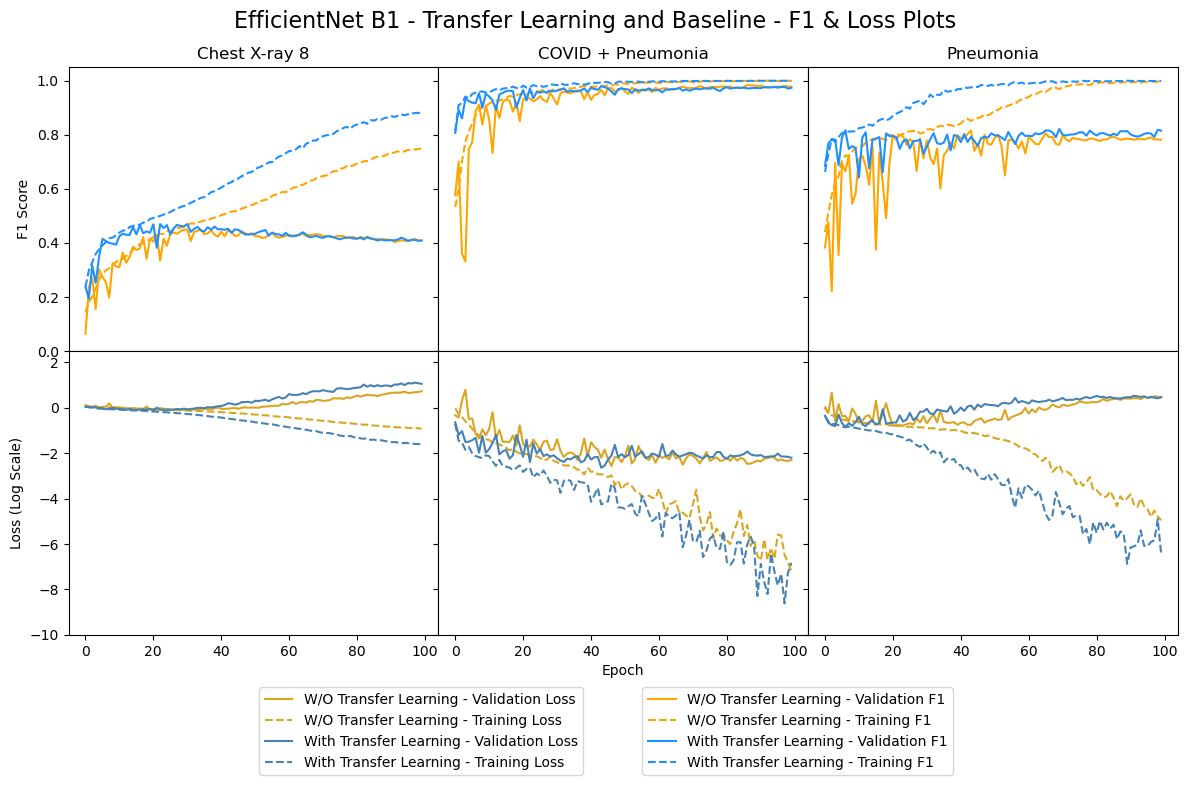

In [122]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
ax1, ax2 = gs.subplots(sharex='col', sharey='row')

fig.suptitle(f'EfficientNet B1 - Transfer Learning and Baseline - F1 & Loss Plots', fontsize=16)
epochs = [i for i in range(int(num_epochs))]
color = 'black'
for i, (curr_dataset, curr_dataset_name) in enumerate(dataset_names.items()):
    
    ax1[i].set_title(f'{curr_dataset_name}')
   
    
    # Plot F1
    for model in model_name:
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(tl_model_params[curr_dataset]['val_true'][model], tl_model_params[curr_dataset]['val_pred'][model])],
                 label=f'{model_names[model]} - Validation F1', 
                 color=colors_acc[model])
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(tl_model_params[curr_dataset]['train_true'][model], tl_model_params[curr_dataset]['train_pred'][model])],
                 label=f'{model_names[model]} - Training F1', 
                 color=colors_acc[model], linestyle='--')

    ax1[i].tick_params(axis='y', labelcolor=color)   
    ax1[i].set_ylim([0, 1.05])


    for model in model_name:
        ax2[i].plot(epochs, 
                 np.log(tl_model_params[curr_dataset]['val_loss'][model]),
                 label=f'{model_names[model]} - Validation Loss', 
                 color=colors_loss[model])
        ax2[i].plot(epochs, 
                 np.log(tl_model_params[curr_dataset]['train_loss'][model]),
                 label=f'{model_names[model]} - Training Loss', 
                 color=colors_loss[model], linestyle='--')

    ax2[i].set_ylim([-10, 2.5])
    ax2[i].tick_params(axis='y', labelcolor=color)    



ax1[1].legend(bbox_to_anchor=(1., -2.1, 0.41, 0.94))
ax2[1].legend(bbox_to_anchor=(0., -1.1, 0.41, 0.94))


ax1[0].set_ylabel('F1 Score')
ax2[1].set_xlabel('Epoch')
ax2[0].set_ylabel('Loss (Log Scale)', color=color)
        
fig.tight_layout()
#fig.savefig("f1_loss_separate.png", format="png", dpi=600, bbox_inches="tight")
fig.savefig("transfer_learning.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)
#fig.savefig("f1_loss_separate.pdf", format="pdf", dpi=1200, bbox_inches="tight", transparent=True)

#fig.legend(bbox_to_anchor=(0., -1., 0.41, 0.94))

In [84]:
models = ["resnet34", "mobile_net_v3_large", "efficient_net_b1"]
datasets = ['chest_xray_8', 'covid_pneumonia', 'pneumonia']

In [89]:
import seaborn as sns

In [88]:
model_labels = ['Effusion',
 'No Finding',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Consolidation']

<AxesSubplot:>

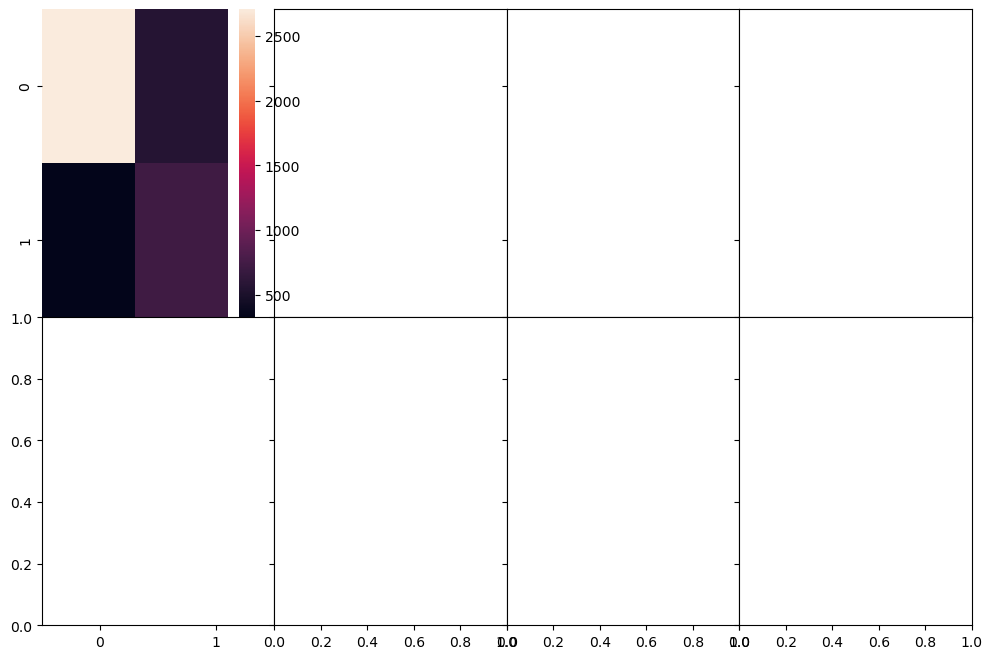

In [91]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 4, hspace=0, wspace=0)
ax1, ax2 = gs.subplots(sharex='col', sharey='row')
labels = [""]
sns.heatmap(test['cm'][0], ax=ax1[0])

In [ ]:
plt.figure(figsize=(12,8))
ax= plt.subplot()

vmin = np.min(df_cm)
vmax = np.max(df_cm)
off_diag_mask = np.eye(*df_cm.shape, dtype=bool)
labels = ['Atelectasis','Effusion','Infiltration','Mass','No Finding','Nodule','Pneumothorax']

sns.heatmap(df_cm, annot=True, fmt="g", mask=~off_diag_mask, cmap='Greens',vmin=vmin, vmax=vmax,ax=ax)
sns.heatmap(df_cm, annot=True, fmt="g", mask=off_diag_mask, cmap='gray_r',vmin=vmin, vmax=vmax,xticklabels=labels, yticklabels=labels)
ax.set_title('Confusion Matrix for Chest X-ray8 Dataset using Resnet');

In [85]:
for model in models:
    with open(f'../../models/eval_metrics_{model}_{datasets[0]}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
        test = pickle.load(handle)
    print(test['cm'])

[[[2818  455]
  [ 474  571]]

 [[2722  551]
  [ 398  647]]

 [[3532  227]
  [ 394  165]]

 [[3180  483]
  [ 497  158]]

 [[2517  754]
  [ 483  564]]

 [[3574  299]
  [ 304  141]]

 [[2995  857]
  [ 175  291]]]
[[[2832  441]
  [ 515  530]]

 [[2589  684]
  [ 307  738]]

 [[3319  440]
  [ 362  197]]

 [[3213  450]
  [ 491  164]]

 [[2630  641]
  [ 567  480]]

 [[3413  460]
  [ 263  182]]

 [[3141  711]
  [ 210  256]]]
[[[2708  565]
  [ 326  719]]

 [[2864  409]
  [ 403  642]]

 [[2946  813]
  [ 228  331]]

 [[2982  681]
  [ 387  268]]

 [[2695  576]
  [ 552  495]]

 [[3250  623]
  [ 228  217]]

 [[2986  866]
  [ 170  296]]]


In [82]:
test

{'acc': 0.789882882286773,
 'f1': 0.4107650204486378,
 'cm': array([[[2818,  455],
         [ 474,  571]],
 
        [[2722,  551],
         [ 398,  647]],
 
        [[3532,  227],
         [ 394,  165]],
 
        [[3180,  483],
         [ 497,  158]],
 
        [[2517,  754],
         [ 483,  564]],
 
        [[3574,  299],
         [ 304,  141]],
 
        [[2995,  857],
         [ 175,  291]]], dtype=int64),
 'outputs': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 'targets': array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}

In [78]:
with open(f'../../models/eval_metrics_efficient_net_b1_pneumonia_tl_100_32_0.01_0.001_.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [79]:
test

{'acc': 0.7958950969213228,
 'f1': 0.7822862775009373,
 'cm': array([[227,   0,   9],
        [ 10, 346,  61],
        [ 12,  87, 125]], dtype=int64),
 'outputs': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 2, 2